# Traitement de Signal IMAC1 : TP de présentation de Python

## Fonctionnalité ''notebook'' de  ```jupyter``` 

1) Une cellule (*markdown* ou code Python) est évaluée en tapant SHIFT+ENTREE

2) Pour éditer une cellule *markdown* déjà compilée, simplement double-cliquez sur celle-ci. 

3) Voici un exemple simple d'utilisation de LaTeX dans *markdown*

Une formule en ligne $\frac{\sqrt{2}}{\pi + n^3}$. Ou bien centrée $$\frac{\sqrt{2}}{\pi + n^3}$$

On pourra consulter, par exemple, [cette page](https://docs.framasoft.org/fr/grav/markdown.html) afin d'utiliser certaines possibilités de *markdown*. 

## Premiers pas avec ```python```

Dans cette unité de traitement du signal, nous appellerons des fonctions qui ne sont pas définies nativement dans ```python```mais nous ferons appel aux librairies suivantes : voir [la page](https://www.scipy.org/). 
 * ```numpy``` pour créer, manipuler des vecteurs et des matrices
 * ```scipy``` qui contient des fonctions avancées (calcul FFT par exemple, intégration numérique, etc.)
 * ```matplotpy```qui contient tout un ensemble de routines graphiques 
 
 Afin de vous familiariser avec cet environnement de travail, nous proposons de traiter  un exemple programme qui effectue les actions suivantes :
 * définir  la fonction ```python```qui calcule les valeurs de la fonction $$f(t)=t^{\alpha}e^{-\sigma t}\cos(2\pi f_0 t )$$ lorsque $t$ appartient à un ensemble discret $t_0,t_1,...,t_{N-1}$;
 * en choisissant $\sigma=1$, $\alpha=1$ et $f_0=440$ dessiner le graphe $t\mapsto f(t)$ pour $t \in [0,10]$; 
 * effectuer un zoom du graphe précédent sur la zone $t \in [3,3.1]$;
 * convertir (coder) le signal au format **wav** et l'exporter  

## La librairie indispensable pour le traitement du signal : ```numpy```

L'objet fondamental est un ```array```, soit un  un tableau multi-dimensionnel : vecteur, matrice ou tenseur. [Téléchargez ce manuel](http://perso.univ-perp.fr/langlois/images/pdf/mp/www.mathprepa.fr-une-petite-reference-numpy.pdf) qui nous servira de référence. 

In [24]:
import numpy as np

Le code qui suit permet de créer deux  vecteurs en  colonne et d'effectuer quelques opérations élémentaires. 

In [25]:
N=5;
x1 = np.array([[1.0 , 0] , [-1 , 2] , [ -1 , 2]]);  ### 1.0 plutôt que 1 : le 1.0 impose que le type des entrées soit réel
x2 = np.arange(4,dtype="float");  ### force les nombres à être des réels plutôt que des entiers
print("x1=",x1)
print()
print("x2=",x2)

print(np.shape(x1)) ### le tableau des dimensions : (n,p) pour une matrice nlignes/p colonnes
print(np.ndim(x1))  ### nombre de dimensions : 1 pour un vecteur, 2 pour une matrice
print(np.size(x1))  ### nombre d'éléments du tableau

print(np.size(x1,0))  ### nombre de lignes de la matrice
print(np.size(x1,1))  ### nombre de colonnes de la matrice


x1= [[ 1.  0.]
 [-1.  2.]
 [-1.  2.]]

x2= [0. 1. 2. 3.]
(3, 2)
2
6
3
2


Outre les routines habituelles de calcul matriciel (produit de matrices, produit scalaire, inversion de matrices...), les fonctions ```numpy``` permettent d'appliquer à chacun des éléments du tableau une fonction telle que $\cos$ ou $\exp$... sans qu'il soit nécessaire de parcourir le tableau grâce à une boucle. Exemples : 

In [26]:
print(np.exp(x2))

print(x2**2)   ### élever les composantes au carré 

[ 1.          2.71828183  7.3890561  20.08553692]
[0. 1. 4. 9.]


Autre "truc" que nous utiliserons fréquemment : multiplier deux vecteurs terme-à-terme. Par exemple, si l'on souhaite calculer les valeurs de la fonction $g(t)=\frac{t}{t+1}$ aux instants $t\in \{ 0, 1 2 3\}$ : 

In [27]:
t=np.arange(4)
n=np.size(t)
tableau = np.zeros(2*n).reshape(2,n)   ### on crée ici une matrice de 0 à 2 lignes
tableau[0,:]=t
tableau[1,:]=t/(t+1)  ### observez bien : le +1 ajoute 1 à toutes les composantes. Le / est la division terme-à-terme

print(tableau)  ## la 1ere ligne : les t et la seconde : les f(t)



[[0.         1.         2.         3.        ]
 [0.         0.5        0.66666667 0.75      ]]


### Définir et utiliser une fonction 

Un cours bien fait sur les fonctions ```python```se trouve [ici](https://www.courspython.com/fonctions.html). Attention! le corps de la fonction est identé par rapport au préambule ```def```. Le corps de la fonction se termine (au sein d'une cellule donnée) dès que l'on revient à la ligne, sans indentation. Je conseille de changer de cellule une fois la fonction codée. Une fois compilée, on peut au sein d'une cellule demander des renseignements sur la fonction en tapant son nom (complétion possible : TAB) puis en tapant SHIFT+TAB

In [28]:
def diapason(t , alpha, sigma , f0): 
    "<t> est un vecteur de temps; <alpha> : position du maximum, <sigma> : atténuation et  <f0> fréquence"
    omega0=f0*2*np.pi;
    out = (t**alpha)*(np.exp(-sigma*t))*(np.cos(omega0*t));  ## obsrevez bien l'utilisation des opérations terme-à-terme
    return out
            

In [29]:
t=np.array([0.0 , 0.01 , 1 ]);
diapason(t,1,1,440)

array([ 0.        , -0.00800967,  0.36787944])

In [30]:

import numpy as np

Fs= 10000; ## la fréquence d'échantillonnage
Ts = 1/Fs; ## le pas d'échantillonnage
t= np.arange(0, 10, Ts);
alpha=1;
attenuation = 1;
f0=440;
signal = diapason(t,alpha,attenuation,f0);


In [31]:
print(np.size(signal))  ### donne la taille d'un vecteur (nombre de composantes)

print(np.size(t))

100000
100000


### Les graphiques

[Page d'aide pour les fonctions graphiques](http://www.python-simple.com/python-matplotlib/matplotlib-intro.php). On pourra aussi consulter [la page du site de la librairie](https://matplotlib.org/gallery/index.html)  ```matplotlib``` ou encore [cette page en français](https://python.developpez.com/tutoriels/graphique-2d/matplotlib/).

In [32]:
import matplotlib.pyplot as plt ### ou encore from matplotlib import pyplot as plt

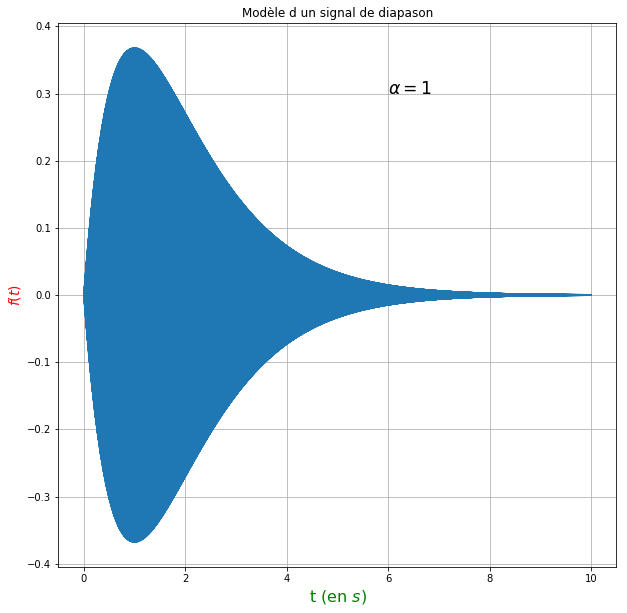

In [33]:
plt.figure(1,figsize = (10, 10))  ### figure no 1, taille en inches : 10in = 25.4cm
plt.plot(t,signal);
plt.xlabel('t (en $s$)',color = 'green', fontsize = 16)   ##label de l'axe des x.
plt.ylabel(r'$f(t)$', fontsize = 14, color = 'red') ## label de l'axe des y.
plt.title('Modèle d un signal de diapason') #titre
plt.text(6, 0.3, r'$\alpha = 1$', size = 'xx-large') 
plt.grid(True) ## affiche une grille.
#plt.annotate('my text', xy = (3, 8), xytext = (2, 12), arrowprops = {'facecolor': 'black', 'shrink': 0.1}) #(xy indique où se trouve le point à annoter, xytext indique où démarre le texte, et arrowprops sont les propriétés de la flèche d'annotation.



Version agrandie : 

(-0.2, 0.2)

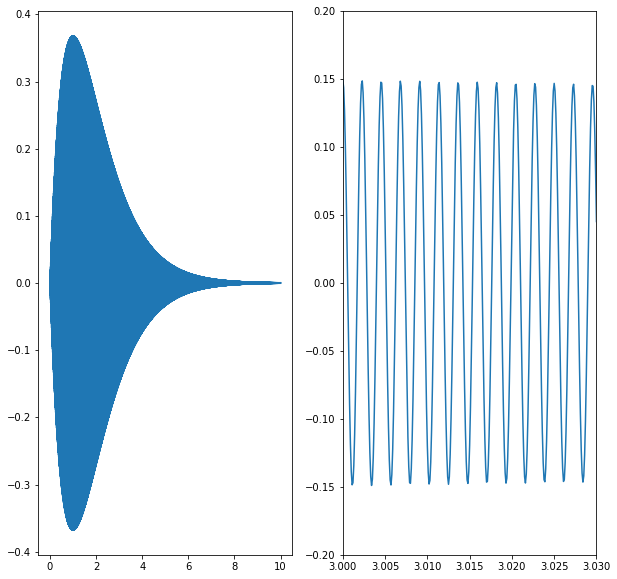

In [34]:
plt.figure(2,figsize = (10, 10)) 
plt.subplot(1,2,1)  ## coupe la figure courante en un tableau de 1x2 figures et active la 1ere (on compte ligne à ligne)
plt.plot(t,signal);
plt.subplot(1,2,2)  
plt.plot(t,signal);
plt.xlim(3,3.03)
plt.ylim(-0.2,0.2)



### Exporter/importer en **wav**

In [35]:
from scipy.io import wavfile as wav

In [36]:
rate, data = wav.read('la_piano.wav')

*Commentaire* : la fonction ```read``` de la librairie ```wavfile``` renvoie : 
* ```rate``` : la fréquence d'échantillonnage
* ```data``` : le signal au format ```array``` de la librairie ```numpy```

**Attention** les valeurs du signal sont des entiers signés. 

In [37]:
rate

44100

In [38]:
data

array([[-60,  -2],
       [-59,   0],
       [-57,  -3],
       ...,
       [  0,   0],
       [  0,   0],
       [  0,   0]], dtype=int16)

In [39]:
data[0:10,0]

array([-60, -59, -57, -54, -58, -63, -64, -64, -59, -53], dtype=int16)

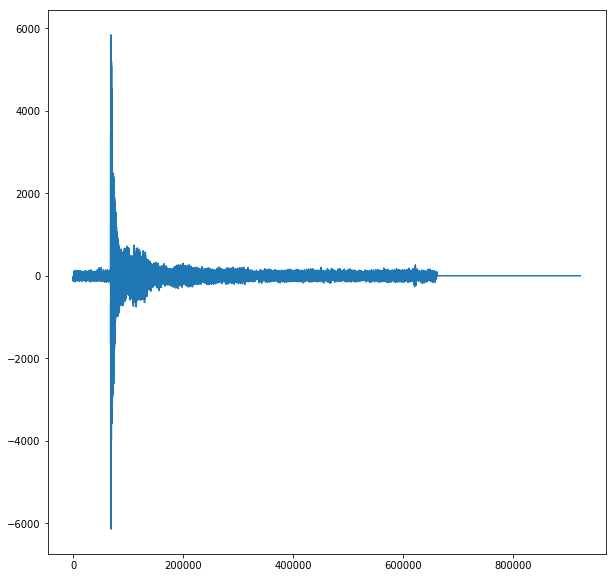

In [40]:
plt.figure(2,figsize = (10, 10)) 
plt.plot(data[:,0]);

Pour obtenir le nombre d'échantillons et le nombre de canaux (1 = mono, 2 = stéréo) : 

In [41]:
np.shape(data)

(921600, 2)

On souhaite réaliser le traitement suivant : 
* créer un effet d'écho en ajoutant au signal $x(t)$ une version décalée et atténuée $a x(t-\tau)$ où $\tau$ est le retard et $a$ le facteur d'atténuation. 
* enregistrer le signal dans un fichier ```wav```
    


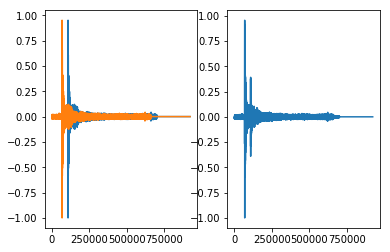

In [42]:
def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 

def show_info(aname, a):
    print("Array", aname)
    print("shape:", a.shape)
    print("dtype:", a.dtype)
    print("min, max:", a.min(), a.max())
    print()

x = normaliser_son_mono(data[:,0])
N = np.size(x); 

tau= 0.9  ## décalage en secondes
a = 0.4;  ## atténuation
n0 = int(tau*rate); ## le retard en nombre d'échantillons : int renvoie bien un entier 
x_echo = np.zeros(N); 
x_echo[n0:(N-1)] = x[0:(N-n0-1)];
plt.figure(4)
plt.clf    ### pour effacer la figure
plt.subplot(1,2,1)
plt.plot(x_echo)
plt.plot(x)


y= x+a*x_echo; 
plt.subplot(1,2,2)
y = normaliser_son_mono(y)
plt.plot(y)


scaled = np.round(32767*y)   ### passage en 16 bits
newdata = scaled.astype(np.int16)   ### conversion en type int
wav.write('newname.wav', rate, newdata)   ### codage en wav


## Travail à effectuer (à la suite de ce *notebook*)

1) Ecrire une fonction qui prend comme paramètres 
     * un signal (mono-dimensionnel) 
     * la fréquence d'échantillonnage
     * un nom de fichier ```toto.wav```
     et qui crée le fichier ```wav``` dans le répertoire courant. 
     
2) Testez votre fonction sur le signal suivant : à partir de l'enregistrement ```la_piano.wav``` utilisé précédemment, créez le signal $y(t)=x(t)+a_1x(t-\tau_1)+a_2x(t-\tau_2)$ où vous choisirez vous-même les constantes $a_1,a_2,\tau_1,\tau_2$.

3) Soit  le signal $$p_{f_0,K}(t)=\left( \cos(2\pi f_0 t )\right) ^{2K+1}$$ où $K$ est un entier naturel et $f_0$ une fréquence.  
        Superposez les graphes de $p_{1,K}(t)$ sur l'intervalle $[-2.5 \ , \ 2.5]$ et pour les valeurs 
       $K \in \{1 , 4 , 20 \}$ : vous choisirez 3 couleurs. 
        Vous ajouterez une légende. 
        Quelle est l'allure du graphe quand $K$ est très grand? Expliquez.    

4) Soit le son suivant de synthèse suivant : $$y(t)=t^{\alpha}e^{-\sigma t} p_{f_0,K}(t) $$ défini pour tous les $t\geq 0$. Vous choisirez d'abord le choix des paramètres suivant : 
      $\alpha= 1$,       $\sigma = 1$,      $f_0=440$Hz et       $K=2$. 
 Créez ce signal : durée $3$ secondes, fréquence d'échantillonnage $F_s=44100$Hz. Visualisez-le. 
 
5) Encodez ce son en ```wav``` et écoutez. Commentez le résultat obtenu. 

6) Reprenez les deux questions précédentes mais cette fois en choisissant un autre jeu de paramètres (gardez $f_0=440$Hz) qui conduise à un son qui vous semble intéressant. Vous répondrez aux questions :
    * quelle est l'influence de $\sigma$?
    * quelle est l'influence de $\alpha$?
    * percevez-vous des différences de timbre (à $\sigma$ et $\alpha$ fixés) lorsque $K$ croît? 

# ------------------------ TRAVAIL -----------------------

## 0) Étude d'une fonction enveloppe

De forme $f(t) = t^\alpha e^{-\theta t}$

Première est :
$$f(t) = t^2 e^{-t}$$

Seconde est :
$$f(t) = t^3 e^{-t}$$

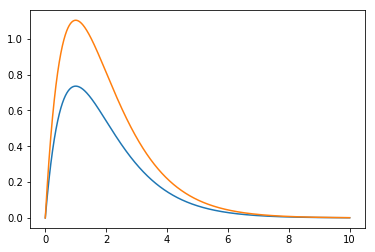

In [68]:
import matplotlib.pyplot as plt
import numpy as np

fs = 1000
ts = 1 / fs
t = np.arange(0, 10, ts)

plt.figure(1)
plt.plot(t, t * 2 * np.exp(-t)) # La premiere
plt.plot(t, t * 3 * np.exp(-t)) # La seconde

On abstracte ce fonctionnement dans une fonction

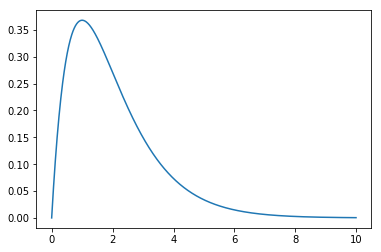

In [70]:
def enveloppe(t , alpha, sigma): 
    """
        <t> est un vecteur de temps
        <alpha> : position du maximum
        <sigma> : atténuation
    """
    # Operateur ** est la puissance
    out = (t ** alpha) * (np.exp(-sigma * t))
    return out

# Creation d'un vecteur de temps
t = np.arange(0, 10, 0.01)

plt.plot(t, enveloppe(t, 1, 1)) # La premiere


## 1) Enregistrement de signal en .wav


In [85]:
from scipy.io import wavfile as wav

rate, data = wav.read('la_piano.wav')
wav.write("toto.wav", 44100, data)

## 2) Création de signal à partir de fichier source

À partir de l'enregistrement ```la_piano.wav``` créez le signal $y(t)=x(t)+a_1x(t-\tau_1)+a_2x(t-\tau_2)$ où vous choisirez vous-même les constantes $a_1,a_2,\tau_1,\tau_2$.

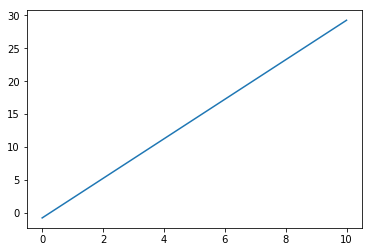

In [86]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

t = np.arange(0, 10, Ts)
a1 = 1
a2 = 1
tau1 = 0.25
tau2 = 0.5
y = t + a1 * (t - tau1) + a2 * (t - tau2)
                              
rate, data = wav.read('la_piano.wav')
# Data est en stereo, mais le channel de droit est du bruit

plt.plot(t, y)


## 3) Analyse de signal

$$p_{f_0,K}(t)=\left( \cos(2\pi f_0 t )\right) ^{2K+1}$$ où $K$ est un entier naturel et $f_0$ une fréquence.

Superposez les graphes de $p_{1,K}(t)$ sur l'intervalle $[-2.5 \ , \ 2.5]$ et pour les valeurs 
       $K \in \{1 , 4 , 20 \}$ : vous choisirez 3 couleurs. 
        Vous ajouterez une légende. 
        Quelle est l'allure du graphe quand $K$ est très grand? Expliquez. 

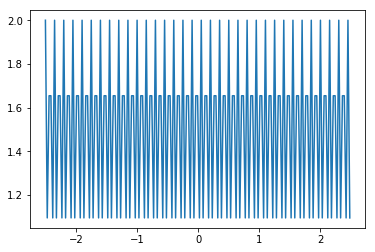

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

Fs = 10000; # la fréquence d'échantillonnage (rate en anglais)
Ts = 1 / Fs; # le pas d'échantillonnage
t = np.arange(-2.5, 2.5, 0.03)

f0 = 440
K = 1

y = (np.cos(2 * np.pi * f0 * t)) ** 2 * K + 1

plt.plot(t, y)

## 4) Son de synthèse
$$y(t)=t^{\alpha}e^{-\sigma t} p_{f_0,K}(t) $$ défini pour tous les $t\geq 0$. Vous choisirez d'abord le choix des paramètres suivant : 
      $\alpha= 1$,       $\sigma = 1$,      $f_0=440$Hz et       $K=2$. 
 Créez ce signal : durée $3$ secondes, fréquence d'échantillonnage $F_s=44100$Hz. Visualisez-le. 

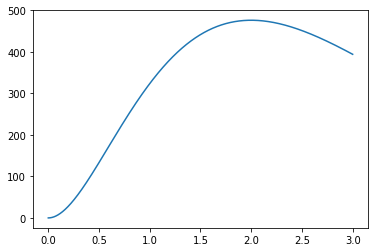

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile as wav

Fs = 44100; # la fréquence d'échantillonnage
Ts = 1 / Fs; # le pas d'échantillonnage
t = np.arange(0, 3, Ts)

sigma = 1
alpha = 1
f0 = 440
K = 2

y = t ** alpha * np.exp(-sigma * t) * f0 * K * t

plt.plot(t, y)

## 5) Encoder son de synthèse en .wav

In [81]:
wav.write("ex5.wav", 44100, y)

## 6) Questions / Réponses

* quelle est l'influence de $\sigma$?
* quelle est l'influence de $\alpha$?
* percevez-vous des différences de timbre (à $\sigma$ et $\alpha$ fixés) lorsque $K$ croît? 

# Notes cours

Le LA est à une fréquence de 440Hz, c'est à dire qu'il est périodique 440 fois par secondes.

Quand on zoom près, le signal ressemble à un sinus, mais en s'éloignant, on remarque que le signal à de la déperdition. On peut modéliser cette évolution avec une `fonction d'attaque`. 

## Un modèle possible de fonction d'attaque

$e(t)= t^\alpha e^{ -\sigma t }$

avec $\alpha, \sigma > 0$ et t qui représente le temps

Plus le sigma est grand, plus l'atténuation du son met du temps à arriver

Pour la note LA, fonctionne avec  $\alpha = 1, \sigma = 1$

## Pulsasions

Notés en radians

$f(t) = e(t) cos(\omega_0 t)$

$\omega_0 = 2\pi f_0$

Avec $f_0$ une fréquence en Hz

## Code python

On évite d'utiliser les boucles, pour cela on utilise np.arrange, qui permet intilialize un tableau et le remplis avec i+1

In [ ]:
a = np.arange(8)
print(a)

In [ ]:
# Les index de 1 à 3
print(a[1:3])

In [ ]:
# Vecteur de booleans
b = (a >= 2) & (a <= 4)
print(b)

In [ ]:
# Extrait du vecteur, les seules valeurs où b est vrai
np.extract(b, a)

In [ ]:
print(a * b)

## Nouvel exercice

### 1)

$r(t)$ avec $t \in R$

$r(t) = 1$ si $t \in [-1/4 , 1/4]$

$r(t) = 0$ sinon

In [ ]:
# Temps, entre -3 et 3
t = np.arange(-3, 3, 0.01)

# Vecteur de booleans
b = (t >= -1/4) & (t <= 1/4)

# Extrait du tableau temps les seuls moment ou b est vrai
np.extract(b, t)

# Dessin
plt.plot(t, b)

### 2) Periodicité

In [ ]:
# Temps, entre -3 et 3
t = np.arange(-3, 3, 0.01)

# Vecteur de booleans
b = 0 <= np.cos(2 * np.pi * t)

# Extrait du tableau temps les seuls moment ou b est vrai
np.extract(b, t)

plt.plot(t, b)